In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency

In [2]:
dataset = pd.read_csv("heart_disease_uci.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [3]:
print(dataset.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [4]:
print(dataset.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
915    False
916    False
917    False
918    False
919    False
Length: 920, dtype: bool


In [5]:
print(dataset.duplicated().sum())

0


In [6]:
dataset = dataset.drop(columns= ['id'])

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

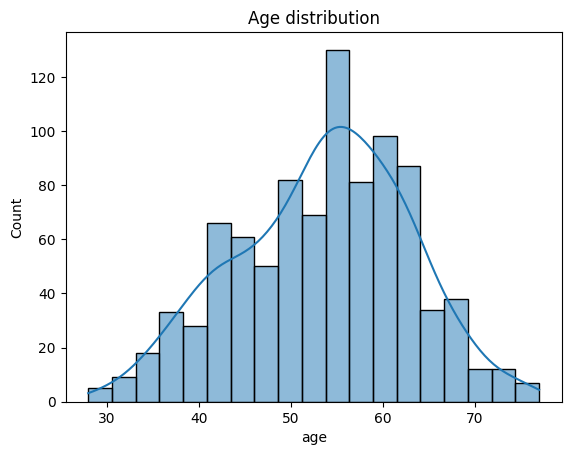

In [9]:
sns.histplot(data = dataset, x= dataset["age"], kde = True)
plt.title("Age distribution")
plt.show()

In [10]:
numeric_cols = dataset.select_dtypes(include=['number']).columns
print(len(numeric_cols))

7


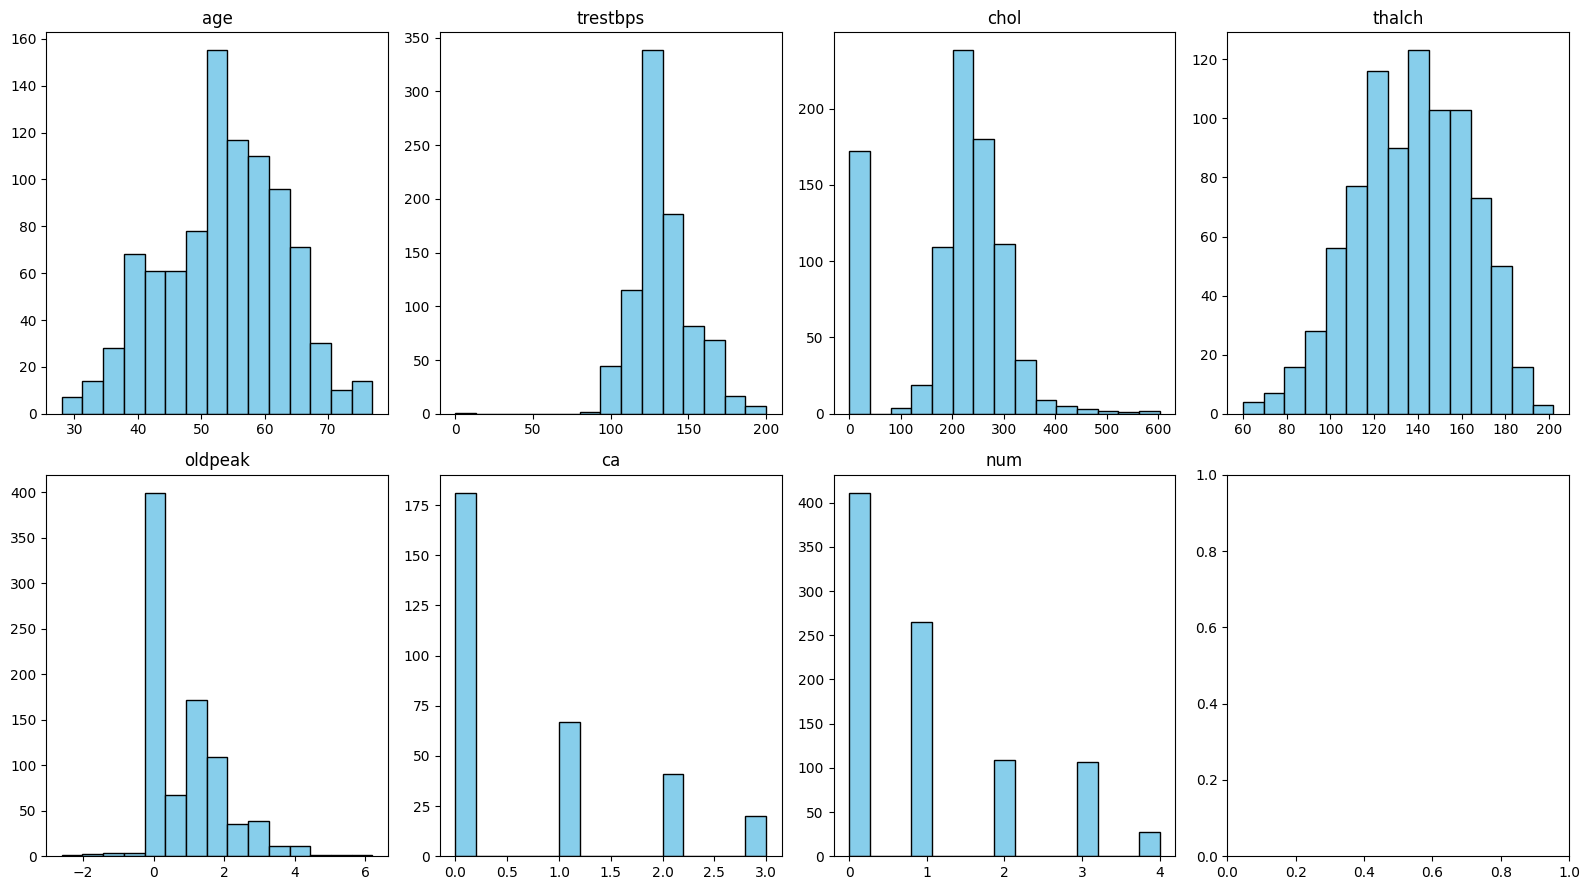

In [11]:
fig, axes = plt.subplots(nrows=2, ncols = 4, figsize=(16,9))

# Flatten the axes array for easy iteration
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
  axes[i].hist(dataset[col], bins = 15, color = 'skyblue', edgecolor = 'black')
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

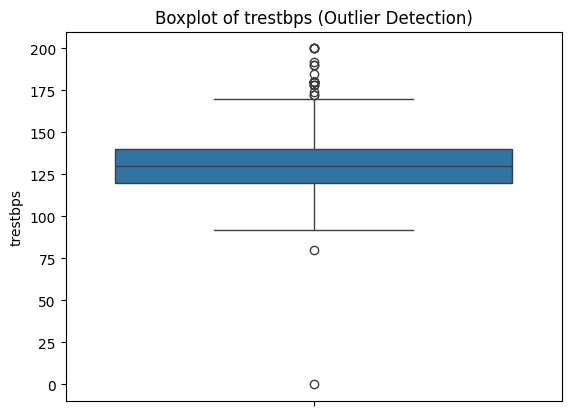

In [12]:
sns.boxplot(data = dataset, y='trestbps')
plt.title("Boxplot of trestbps (Outlier Detection)")
plt.show()

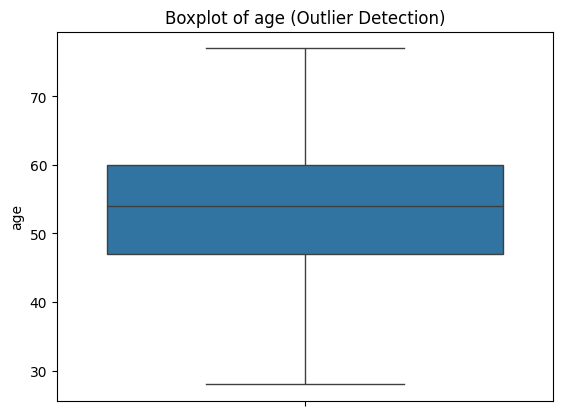

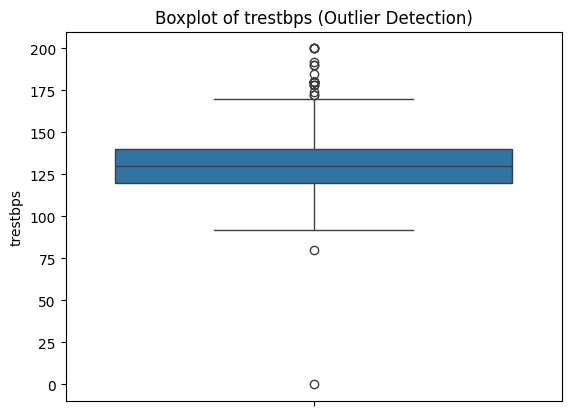

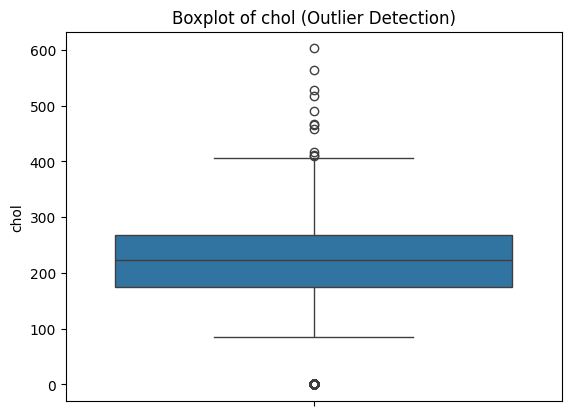

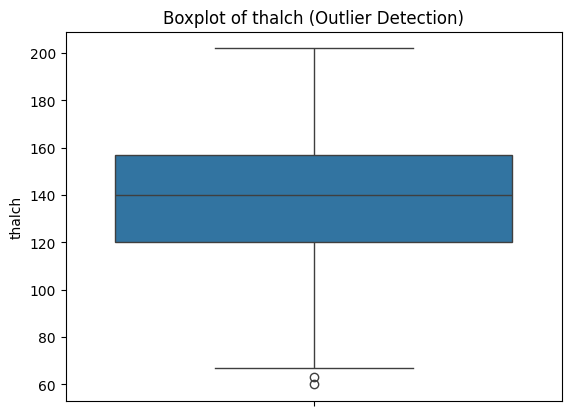

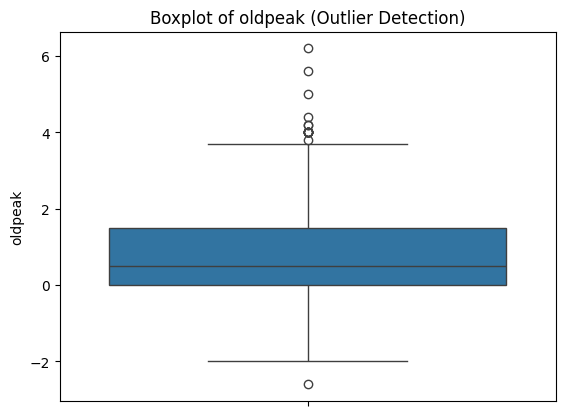

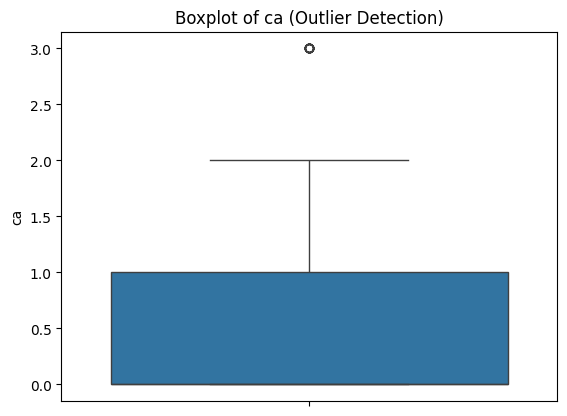

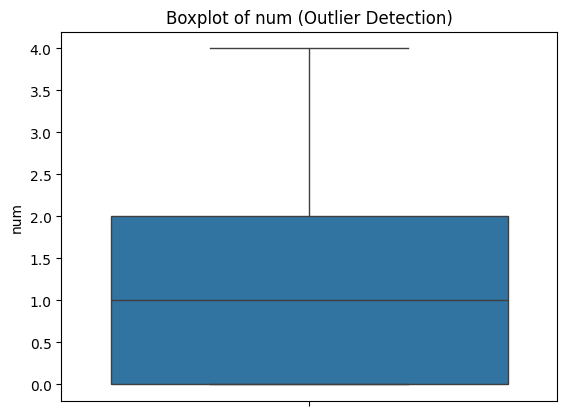

In [13]:
for feature in numeric_cols:
  sns.boxplot(data = dataset, y = feature)
  plt.title(f"Boxplot of {feature} (Outlier Detection)")
  plt.show()

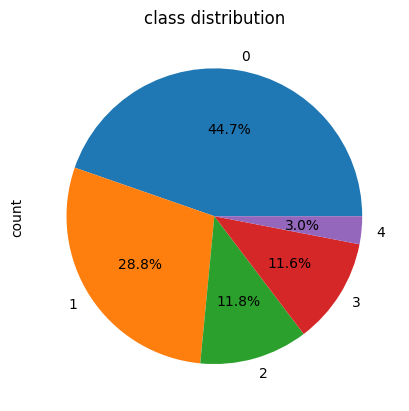

In [14]:
dataset['num'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("class distribution")
plt.show()

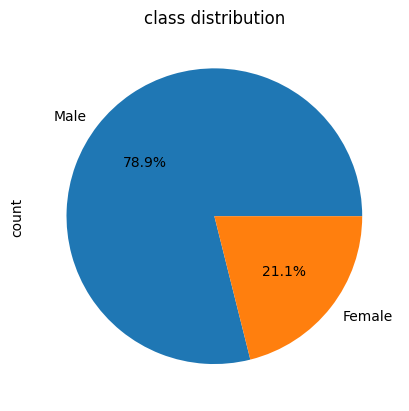

In [15]:
dataset['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("class distribution")
plt.show()

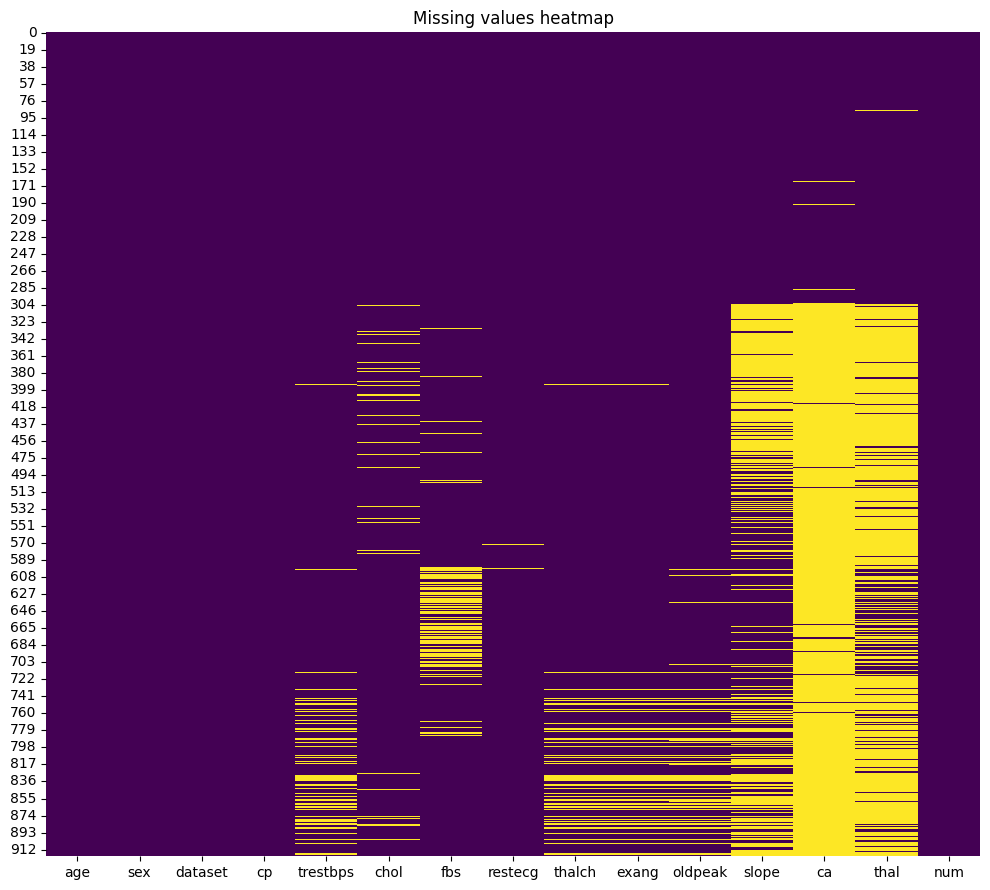

In [16]:
fig = plt.figure(figsize=(10,9))
sns.heatmap(dataset.isnull(), cbar = False, cmap = 'viridis')
plt.title("Missing values heatmap")
plt.tight_layout()
plt.show()

In [17]:
dataset.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55


In [18]:
missing_by_class = dataset.groupby('num')['ca'].apply(lambda x : x.isnull().mean())
print(missing_by_class)

num
0    0.598540
1    0.781132
2    0.669725
3    0.654206
4    0.535714
Name: ca, dtype: float64


In [19]:
# Assuming 'num' is the target column (class) and 'ca' is a feature
missing_by_class = dataset.groupby('num')['thal'].apply(lambda x: x.isnull().mean())
print(missing_by_class)

num
0    0.545012
1    0.600000
2    0.422018
3    0.420561
4    0.428571
Name: thal, dtype: float64


In [20]:
# Assuming 'num' is the target column (class) and 'ca' is a feature
missing_by_class = dataset.groupby('num')['slope'].apply(lambda x: x.isnull().mean())
print(missing_by_class)

num
0    0.469586
1    0.252830
2    0.174312
3    0.242991
4    0.142857
Name: slope, dtype: float64


In [21]:
print(dataset['num'].value_counts())

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [22]:
print(dataset['thal'].value_counts())

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


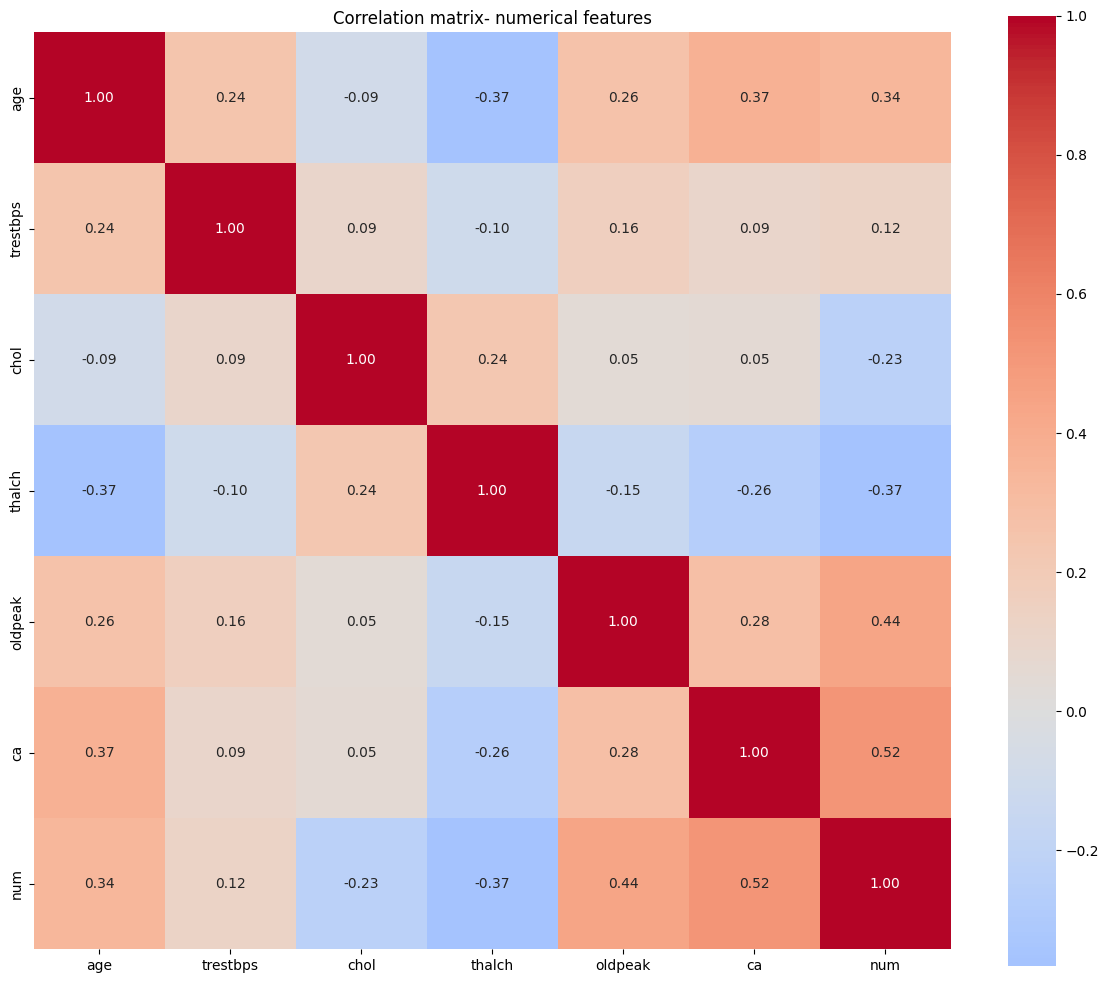

In [23]:
numerical_cols = dataset.select_dtypes(include = [np.number]).columns.tolist()
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns.tolist()

# correlation matrix- numerical features

correlation_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,
            annot = True,
            cmap = 'coolwarm',
            fmt = '0.2f',
            center = 0,
            square = True)
plt.title("Correlation matrix- numerical features")
plt.tight_layout()

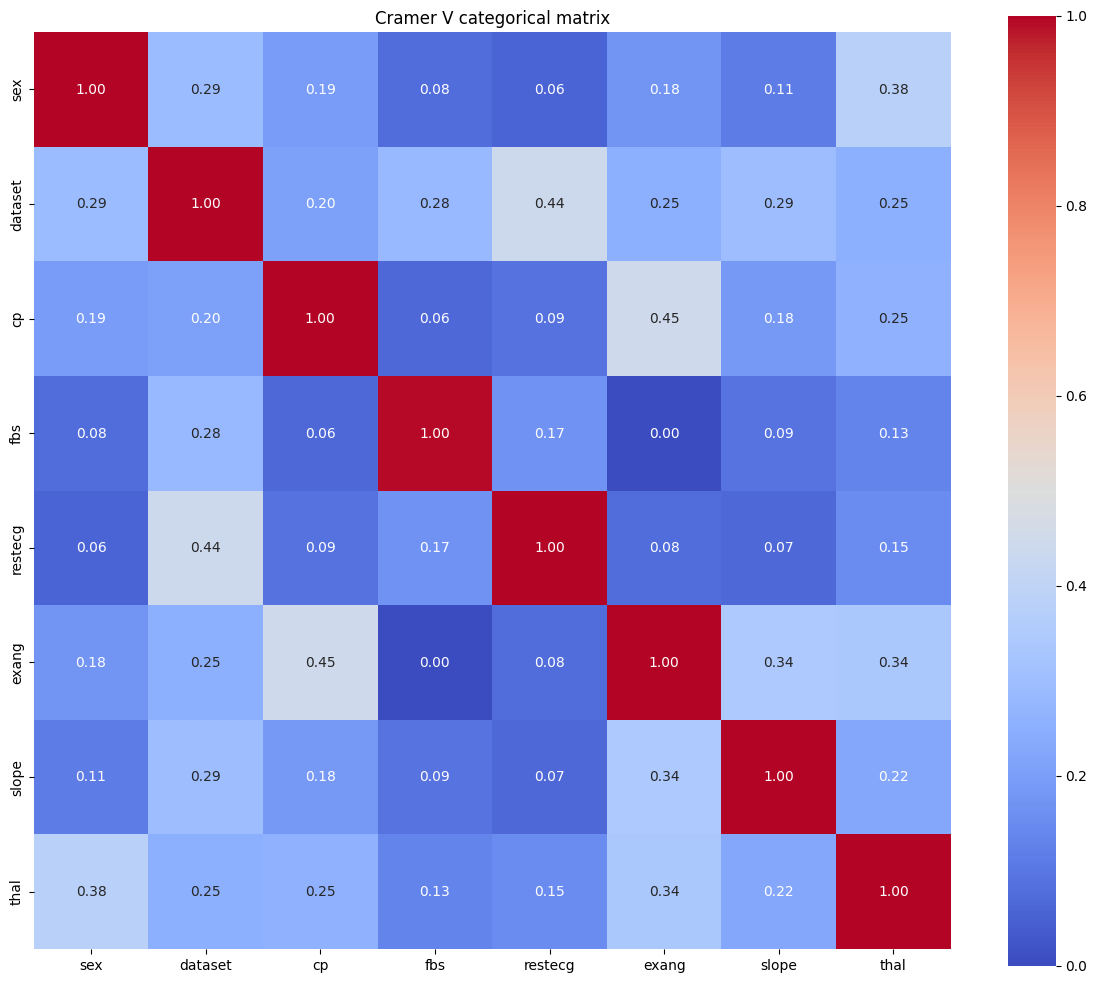

In [24]:
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x,y)
  n = confusion_matrix.sum().sum()
  chi2 = chi2_contingency(confusion_matrix)[0]
  phi2 = chi2/n
  r, k = confusion_matrix.shape

  phi2corr = max(0, phi2- ((k-1)*(r-1))/(n-1))
  rcorr = r- ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min(kcorr-1, rcorr-1))

categorical_matrix = pd.DataFrame(index = categorical_cols, columns  = categorical_cols)

for col1 in categorical_cols:
  for col2 in categorical_cols:
    categorical_matrix.loc[col1, col2] = cramers_v(dataset[col1], dataset[col2])
categorical_matrix = categorical_matrix.astype(float)

plt.figure(figsize = (12, 10))
sns.heatmap(categorical_matrix,
            annot = True,
            cmap = 'coolwarm',
            fmt = '0.2f',
            square = True)
plt.title("Cramer V categorical matrix")
plt.tight_layout()
plt.show()

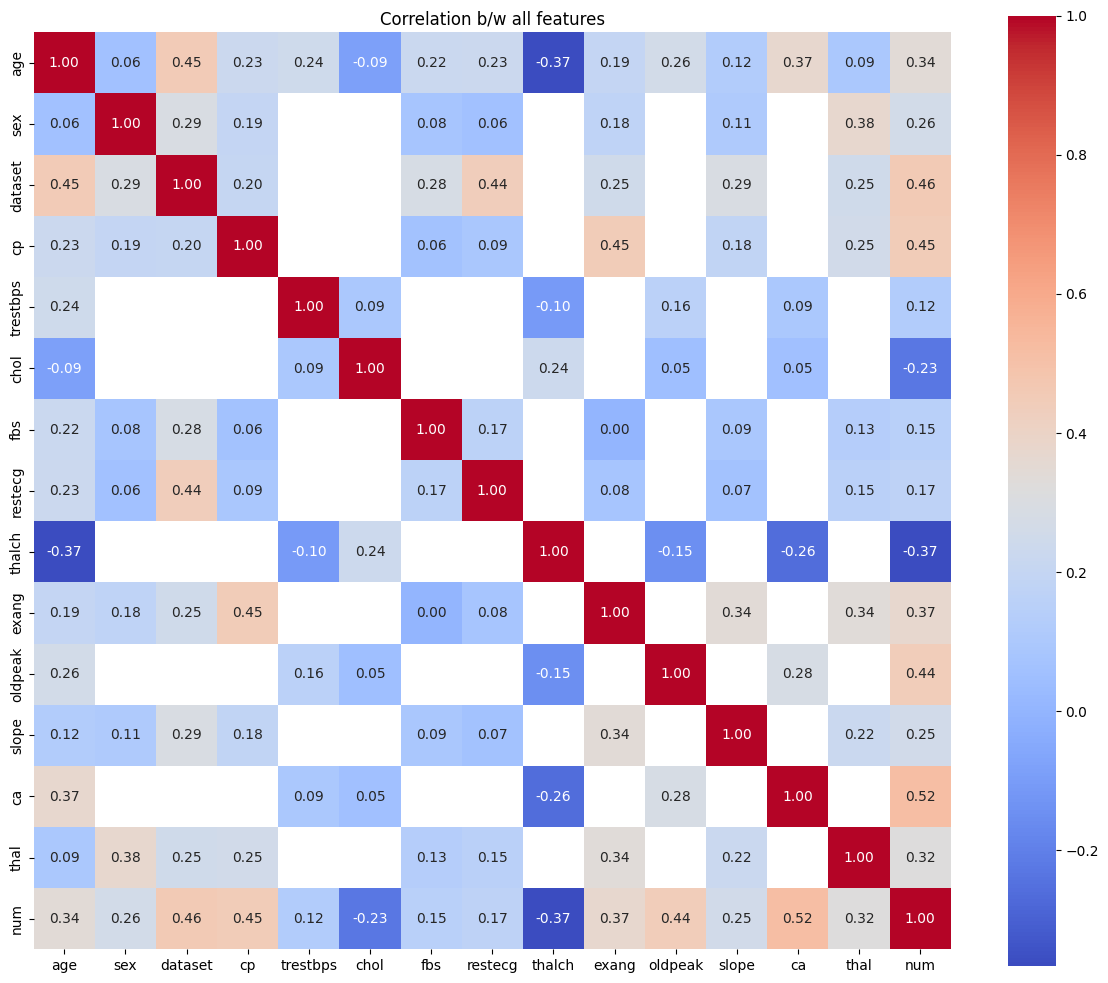

In [25]:
def correlation_ratio(categories, measurements):
  categories = np.array(categories)
  measurements = np.array(measurements)

  fcat, _ = pd.factorize(categories)
  cat_num = np.max(fcat) + 1

  n_array = np.zeros(cat_num)
  y_avg_array = np.zeros(cat_num)

  for i in range(cat_num):
    cat_measures = measurements[np.argwhere(fcat==i).flatten()]
    n_array[i] = len(cat_measures)
    y_avg_array[i] = np.mean(cat_measures)

  y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
  numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),2)))
  denominator = np.sum(np.power(np.subtract(measurements, y_total_avg),2))

  if denominator ==0:
    return 0
  else:
    return np.sqrt(numerator/denominator)

mixed_matrix = pd.DataFrame(index = dataset.columns, columns = dataset.columns)

for col1 in dataset.columns:
  for col2 in dataset.columns:
    if col1 == col2:
      mixed_matrix.loc[col1, col2] = 1

    elif col1 in numerical_cols and col2 in numerical_cols:
      mixed_matrix.loc[col1, col2] = dataset[col1].corr(dataset[col2])
    elif col1 in categorical_cols and col2 in categorical_cols:
      mixed_matrix.loc[col1, col2] = cramers_v(dataset[col1], dataset[col2])
    elif col1 in numerical_cols and col2 in categorical_cols:
      mixed_matrix.loc[col1, col2] = correlation_ratio(dataset[col2], dataset[col1])
    elif col2 in numerical_cols and col1 in categorical_cols:
      mixed_matrix.loc[col1, col2] = correlation_ratio(dataset[col1], dataset[col2])

mixed_matrix = mixed_matrix.astype(float)
plt.figure(figsize= (12,10))
sns.heatmap(mixed_matrix,
            annot = True,
            square = True,
            fmt = '0.2f',
            cmap = 'coolwarm')
plt.title("Correlation b/w all features")
plt.tight_layout()
plt.show()